# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [8]:
# parameter 개수
N = len(X_train.loc[0])

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.55421524, 0.3919842 , 0.57721591])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
$z = X_i \theta$
- 풀어쓰면
### $z = X_{1}\theta_{1}+z + X_{2}\theta_{2}+z + X_{3}\theta_{3}+\varepsilon,\varepsilon \sim N(0,1)$
    - $\varepsilon$은 결과에 거의 영향을 주지 않으므로 생략

In [10]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i] * parameters[i]
    return z

## Logistic Function

$p = \frac{1}{1+e^{-z}}$

### $p = \frac{1}{1 + e^{-(X_{1}\theta_{1} + X_{2}\theta_{2} + X_{3}\theta_{3} + \varepsilon)}},\varepsilon \sim N(0,1)$

In [11]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1 / (1 + np.exp(-z))    
    return p

In [12]:
logistic(X_train.iloc[1], parameters)

0.7396820921083802

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p)= \frac{1}{2}\Sigma(-y_{i}log(\theta^{T}X_i)-(1-y_{i})log(1-\theta^{T}X_i))$
$l(p)= \frac{1}{2}\Sigma(-y_{i}log(\hat{y}_{i}))-(1-y_{i})log(1-\hat{y}_{i}))$

In [13]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = (-(y * np.log(p) + (1 - y) * np.log(1 - p)))/2
    return loss

In [14]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X, parameters)
    loss = (y - y_hat) ** 2 / 2
    return loss

In [15]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [16]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

0.5720069869715811

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=$ $\sum (y_i - \theta^{T}X_i)(-X_{ij})$
## ${\partial\over{\partial \theta_j}}l(p)=$ $\sum (y_i - p_i)(-X_{ij})$

In [17]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X, parameters)
        gradient = -(y - y_hat) * X[j]
    else:  # model == 'logistic'
        p = logistic(X, parameters)
        gradient = (p - y) * X[j]
    return gradient

In [18]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.09545351786188805

<div style="text-align: center;">
    <img src="./img/배치알고리즘구현.png" width="500"/><br>
</div>

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [19]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

In [20]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[49.932474511542004, 7.2054605600290875, 40.3202482589601]

## mini-batch
인덱스로 미니 배치 나누기

In [21]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명

'batch_idx' 함수는 주어진 훈련 데이터 'X_train'을 배치 크기 'batch_size'에 따라 나누는 역할을 합니다. 

1. 전체 데이터의 크기 'N'을 구합니다.
2. 배치의 수 'nb'를 계산합니다. 이는 전체 데이터 크기를 배치 크기로 나눈 후 올림한 값입니다.
3. 'idx'는 데이터의 인덱스를 저장한 배열입니다.
4. 'idx_list'는 배치 크기만큼 인덱스를 나눈 결과를 저장한 리스트입니다. 

'batch_idx'는 주어진 훈련 데이터를 'batch_size' 크기의 배치로 나누고, 각 배치를 구성하는 데이터의 인덱스를 리스트로 반환합니다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [22]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n

    parameters -= gradients
    return parameters

In [23]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.55088641, 0.39150383, 0.57452789])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch:1번의 전체 데이터셋 순회
- num_epoch: 전체 데이터셋의 단일 순회 횟수
<br>

BGD: "학습 한 번(1 iteration)에 모든 데이터셋을 이용해 기울기를 업데이트"  
SGD: "학습 한 번(1 iteration)에 1개의 데이터를 이용해 기울기를 업데이트"  
MGD: "학습 한 번(1 iteration)에 데이터셋의 일부만 사용해 기울기를 업데이트"  
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> "SGD"  
batch_size=k -> "MGD"  
batch_size=whole -> "BGD"  

In [24]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

- bs와 model을 바꿔가며 실행
    - bgd
        - logistic, bs = len(X_train)
        - mse_i, bs = len(X_train)
    - sgd
        - logistic, bs = 1
        - mse_i, bs = 1
    - mgd
        - logistic, bs = 16
        - mse_i, bs = 16

## Logistic Regression

In [25]:
# bs = len(X_train)
new_param_bgd = gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, model = 'logistic', batch_size = len(X_train))
new_param_bgd

epoch: 0  loss: 0.4021658936886148  params: [0.38476047 0.02668757 0.10190792]  gradients: [0.03223572162645936, -0.009630275743579147, 0.01238596303017837]
epoch: 100  loss: 0.22878179376267255  params: [-0.82533558  0.8336051  -0.76130422]  gradients: [0.0036568914065729357, -0.006556885662699085, 0.0064569043597965045]
epoch: 200  loss: 0.19704257485773152  params: [-1.03242281  1.37870366 -1.295535  ]  gradients: [0.0012867181435403433, -0.004559421480959586, 0.004454812138035215]
epoch: 300  loss: 0.1813573912771655  params: [-1.13675033  1.77169365 -1.67835614]  gradients: [0.0008864025968413053, -0.003408264069645734, 0.00330867108577219]
epoch: 400  loss: 0.17219477790549254  params: [-1.2163949   2.07337803 -1.97030361]  gradients: [0.0007223733123512832, -0.0026830475839698066, 0.0025881558063367257]
epoch: 500  loss: 0.16632547091306868  params: [-1.28273523  2.31530588 -2.20304357]  gradients: [0.0006108293270586617, -0.002189240680043741, 0.0021004603199415656]
epoch: 600 

array([-1.50080618,  3.06618855, -2.91737601])

In [26]:
# bs = len(X_train)
new_param_bgd = gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, model = 'mse_i', batch_size = len(X_train))
new_param_bgd

epoch: 0  loss: 0.32986345981074167  params: [0.92188286 0.25503962 0.06720922]  gradients: [0.04399240480716229, -0.005980229669367146, 0.01457009762136759]


array([ 0.21632841,  0.37663842, -0.19533089])

In [27]:
# bs = 1
new_param_sgd = gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, model = 'logistic', batch_size = 1)
new_param_sgd

epoch: 0  loss: 0.1426977831535967  params: [-0.85829251  0.96697171 -1.102522  ]  gradients: [0.025697307458602395, 0.013984499297625949, 0.018080387616792922]
epoch: 100  loss: 0.03868338451606279  params: [-1.93032511  4.17501782 -4.0676896 ]  gradients: [0.007538548565338495, 0.00410248533963834, 0.0053040529771032725]
epoch: 200  loss: 0.038681332763079945  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.007538159522242799, 0.004102273622013555, 0.005303779249982984]
epoch: 300  loss: 0.038681332591808816  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767171, 0.004102273604340288, 0.0053037792271334325]
epoch: 400  loss: 0.038681332591795084  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 0.038681332591795084  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  lo

array([-1.9303681 ,  4.17514311, -4.06780375])

In [28]:
# bs = 1
new_param_sgd = gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, model = 'mse_i', batch_size = 1)
new_param_sgd

epoch: 0  loss: 0.6381736215934474  params: [-0.88076548  0.99369735 -1.12247207]  gradients: [0.025265539882772067, 0.013749530969887179, 0.01777659994783377]
epoch: 100  loss: 3.175868620239967  params: [-1.93032522  4.17501817 -4.06768992]  gradients: [0.007538547484988165, 0.004102484751710658, 0.005304052216978782]
epoch: 200  loss: 3.176007151185473  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.007538159522152619, 0.004102273621964479, 0.005303779249919534]
epoch: 300  loss: 3.1760071627498365  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767166, 0.004102273604340285, 0.005303779227133429]
epoch: 400  loss: 3.1760071627507633  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 3.1760071627507633  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  loss: 3.1760071

array([-1.9303681 ,  4.17514311, -4.06780375])

In [29]:
# bs = 16
new_param_mgd = gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, model = 'logistic', batch_size = 16)
new_param_mgd

epoch: 0  loss: 0.6042477858359293  params: [-0.05304539  0.79558197  0.38305986]  gradients: [0.055796200609354626, 0.05320876229520576, 0.06758636256899303]
epoch: 100  loss: 0.09885738057097225  params: [-1.56507007  3.08269866 -3.02962972]  gradients: [0.0073985270992814565, 0.010906941039237766, 0.014491626084235204]


array([-1.69619248,  3.53519565, -3.43402924])

In [30]:
# bs = 16
new_param_mgd = gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, model = 'mse_i', batch_size = 16)
new_param_mgd

epoch: 0  loss: 1.0697132289545792  params: [0.32962964 0.69674245 0.54395892]  gradients: [0.06325314622740646, 0.057989645320860164, 0.07311026980452083]
epoch: 100  loss: 2.1668773732044246  params: [-1.56046371  3.06779471 -3.01547369]  gradients: [0.007411368660974976, 0.010916163248357277, 0.014528415505318923]
epoch: 200  loss: 2.906180622647143  params: [-1.77341667  3.74568834 -3.65545012]  gradients: [0.0069721349111787284, 0.010562433761358684, 0.013070312068646417]
epoch: 300  loss: 3.268414765193743  params: [-1.86820767  4.04222473 -3.93296829]  gradients: [0.006855333571053441, 0.010444711685840836, 0.012554230705747621]
epoch: 400  loss: 3.4592069924174638  params: [-1.91613648  4.19131947 -4.07196686]  gradients: [0.006809414284576169, 0.010392400715974495, 0.012318422391816304]
epoch: 500  loss: 3.563035143180882  params: [-1.94169636  4.27063056 -4.14576537]  gradients: [0.006787972520926574, 0.010366242206872545, 0.012198933169871947]
epoch: 600  loss: 3.62047050267

array([-1.97157387,  4.3631774 , -4.23175718])

### Predict Label

In [31]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [32]:
from sklearn.metrics import *

In [33]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[ 8, 32],
       [ 0, 10]], dtype=int64)

In [34]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.36


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [35]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [36]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [37]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.11482172, 3.29101704])

In [38]:
#경사하강법(가장 성능이 좋았던 bgd로 진행)
new_param = gradient_descent(X, y, learning_rate = 0.1, num_epoch = 1000, model = 'logistic', batch_size = len(X))
new_param

epoch: 0  loss: -0.2641764770796153  params: [0.35677138 0.90129222]  gradients: [-0.1159442262294915, -0.08364391070419683]
epoch: 100  loss: -6.228801014841486  params: [8.83826127 7.76338713]  gradients: [-0.08178274806292696, -0.0673626896572942]
epoch: 200  loss: -11.841715935946803  params: [17.01637253 14.49963416]  gradients: [-0.08178091855217137, -0.06736244668504032]


C:\Users\dhj98\AppData\Local\Temp\ipykernel_5876\3801438891.py:3: RuntimeWarning: divide by zero encountered in log
  loss = (-(y * np.log(p) + (1 - y) * np.log(1 - p)))/2
C:\Users\dhj98\AppData\Local\Temp\ipykernel_5876\1343608712.py:21: RuntimeWarning: invalid value encountered in double_scalars
  if abs(new_loss - loss) < tolerance:
C:\Users\dhj98\AppData\Local\Temp\ipykernel_5876\2221760771.py:6: RuntimeWarning: invalid value encountered in double_scalars
  loss += loss_function(X, y, parameters)


epoch: 300  loss: nan  params: [25.19446436 21.23587882]  gradients: [-0.08178091828348254, -0.06736244666537959]
epoch: 400  loss: nan  params: [33.37255619 27.97212349]  gradients: [-0.08178091828343277, -0.06736244666537701]
epoch: 500  loss: nan  params: [41.55064801 34.70836816]  gradients: [-0.08178091828343277, -0.06736244666537701]
epoch: 600  loss: nan  params: [49.72873984 41.44461282]  gradients: [-0.08178091828343277, -0.06736244666537701]
epoch: 700  loss: nan  params: [57.90683167 48.18085749]  gradients: [-0.08178091828343277, -0.06736244666537701]
epoch: 800  loss: nan  params: [66.0849235  54.91710216]  gradients: [-0.08178091828343277, -0.06736244666537701]
epoch: 900  loss: nan  params: [74.26301533 61.65334682]  gradients: [-0.08178091828343277, -0.06736244666537701]


array([82.35932624, 68.32222904])

In [39]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

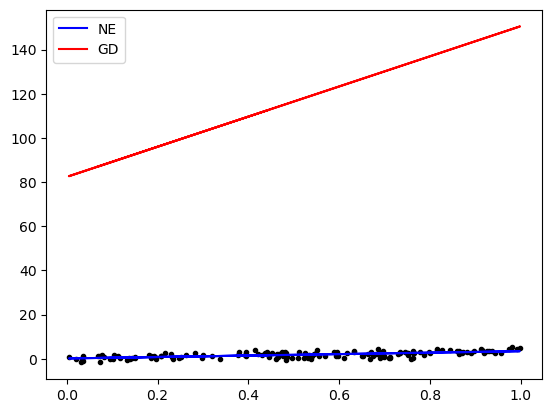

In [40]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()